# Introduction

## What is Machine Learning?

You've certainly come across people taking about Artifical Intelligence (AI) and Machine Learning (ML). Often times these phrases are used interchangeably but they have different meanings. 

Artifical Intelligence is the broad field in computer science of creating intelligent systems. Obviously that can mean many many different things and depends on what you count as "intelligent". Overall AI is generally a blanket learn for research related to producing systems which can produce answers to problems without having to manually program the solution. 

ML is a sub-field of AI where the approach to producing an intelligent system is have a program "learn" a possible solution to a problem. Perhaps you know roughly what the correct solution should look like, but don't every variable. ML provides an answer by having a program learn those variables.

## Where is Machine Learning Helpful?

You'll find machine learning used in places where the solution to a problem is too complex to do by hand. To understand what that means, lets look at a sample problem.

> Detect where in an image a stop sign exists

For this example, I'll be using a few libraries, namely OpenCV. OpenCV is a computer vision library that treats images as matricies and performs matrix operations over them. We won't go into depth on OpenCV, but I'll point out from a high level what it is doing.

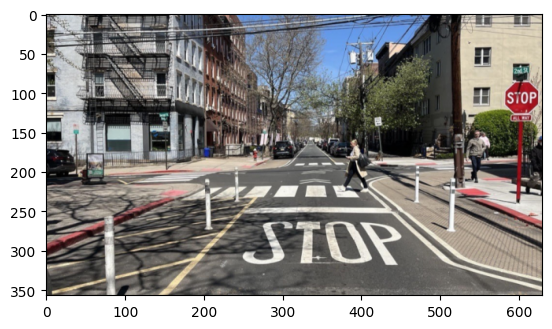

In [3]:
# For computer vision algorithms
import cv2

# For viewing images
from matplotlib import pyplot as plt

im = cv2.imread('data/street_view.png')

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

For this example, we will use a technique known as "template matching". Basically we will take a template (the image of the stop sign) and compare each region of the image against the template. Where ever the match is the highest is where we will say the stop sign is.

For simplicity, we will also have the image and the template in grayscale.

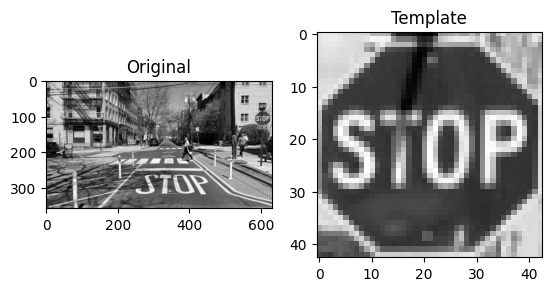

In [40]:
# Let's get the template
template = cv2.imread('data/stop_sign_gray.png', cv2.IMREAD_GRAYSCALE)

# Now lets get the gray version of the image
img_gray = cv2.imread('data/street_gray.png', cv2.IMREAD_GRAYSCALE)

# Let's see what we are working with
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(img_gray, cmap='gray')

axes[1].set_title('Template')
axes[1].imshow(template, cmap='gray')

OpenCV comes with a template matching function that takes in the original image, the template, and how to calculate the similarity of the image. OpenCV supports [many methods](https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d), but we will be using coorrelation coefficent(`cv2.TM_CCOEFF`)

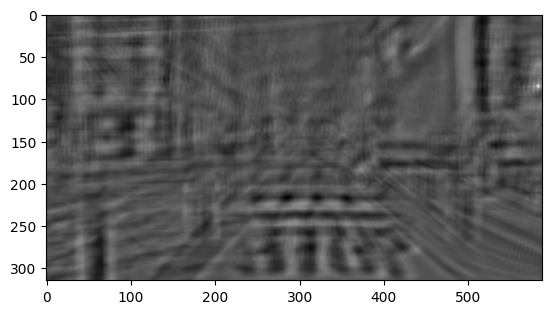

In [41]:
# Use the template matching function
matching_result = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF)

# The result is basically an image showing how the template matches at every spot in the image
plt.imshow(matching_result, cmap='gray')

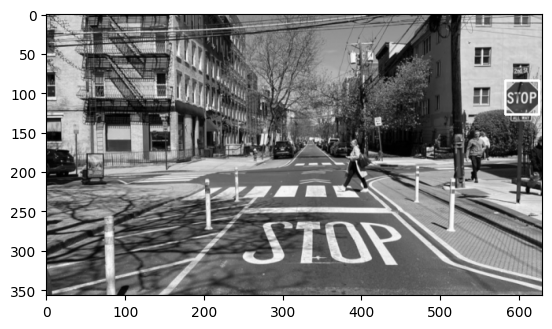

In [43]:
# The location of the maximum pixel will represent where the best match is
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matching_result)

# We will draw a rectangle around the maximum value in the original image to visualize where the match is
top_left = max_loc
w, h = template.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray,top_left, bottom_right, 255, 2)

plt.imshow(img_gray, cmap='gray')

So that works! We can pretty easily find the stop sign in the image based on the basic template. But of course there are some major caveats.

1. What we are looking for needs to have a consistent size in the image
2. The thing we are searching for needs to have a pretty consistent shape
3. Different perspectives of the image is likely going to throw off our matching

So clearly this approach will only work in a handful of situations, so how do we make our system more robust?

If only there was a way to learn a better, more complex representation, of a template to apply to our image.